# Self wave length for elastic slab estimation
---

### Libraries importing

In [35]:
import math
from matplotlib import pyplot as plt
# %matplotlib inline
%matplotlib notebook

---
### Function definition

In [36]:
def w (h, x, lmb):
    return h * math.sin(x * lmb)

In [37]:
def lmbd (dens_underlying, dens_load, D):
    return pow(9.81 * (dens_underlying - dens_load)/(4 * D), 0.25)

In [38]:
def D (h, E, nu):
    return E * pow(h, 3.) / (12. * (1. - nu * nu))

In [39]:
def E (dens, v_p, v_s):
    return 0.5 * dens * v_s*v_s * ( 3. * v_p*v_p - 4. * v_s*v_s) / (v_p*v_p - v_s*v_s)

In [40]:
def nu (v_p, v_s):
    return (0.5 * v_p*v_p - v_s*v_s) / (v_p*v_p - v_s*v_s)

---
### Setting input data

In [41]:
# Thickness of elastic slab, m
T = 60000.
# Slab density, kg/m3
dens = 3300.
# Seismic waves speed, m/s
v_p = 7800.
v_s = 4400.

#Enviroment densities, kg/m3
dens_mantle = 3200.
dens_upper = 1030.

---
### Output data

In [42]:
flex_x = []
flex_w = []

---
### Precalculation

In [43]:
#Defining elastic modules
m_E = E(dens, v_p, v_s)
m_nu = nu(v_p, v_s)

# Flexural rigidity
m_D = D(T, m_E, m_nu)
# Calculation lambda parameter
m_lambda = lmbd(dens_mantle, dens_upper, m_D)

---
### Calculation

In [44]:
flex_x = []
flex_w = []
zero_w = []
# for x in range(179250, 896250, 15000): # for 50km lithosphere
for x in range(0, 1400000, 15000):
    w_x = w (2200, float(x), m_lambda)
    flex_x.append(float(x))
    flex_w.append(w_x)
    zero_w.append(0.0)

<IPython.core.display.Javascript object>


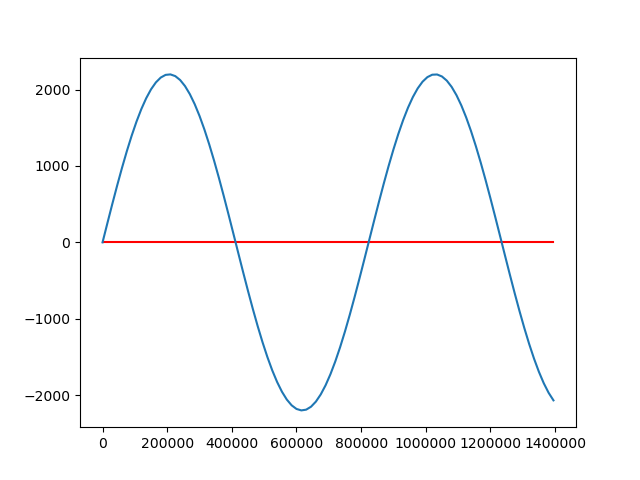

In [45]:
plt.plot(flex_x, zero_w, 'r')
plt.plot(flex_x, flex_w)